#  Testing Models: SVM Classifiers #

In general, classifiers have tended to perform better on this data.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
# read in data set with categorical variables turned into dummy variablees
df = pd.read_csv('data/cleaned_data/md_dum.csv')

# create X and y values for modeling, this time using a mask to create 1 and 0 values for classification
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score'])
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score'])

In [3]:
# train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

### SVC ###

In [4]:
svc = SVC()
svc.fit(X_car_c_train, y_car_c_train)
score = svc.score(X_car_c_test, y_car_c_test)
print('SVC Score on car accidents is: {}'.format(score))

SVC Score on car accidents is: 0.8345100508162072


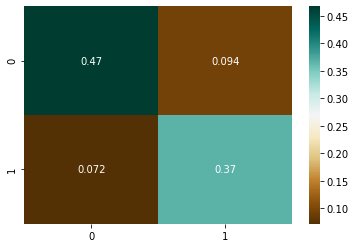

In [7]:
pred = svc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

In [9]:
lsvc = LinearSVC()
lsvc.fit(X_car_c_train, y_car_c_train)
score = lsvc.score(X_car_c_test, y_car_c_test)
print('Linear SVC Score on car accidents is: {}'.format(score))

Linear SVC Score on car accidents is: 0.7242883482484148


C:\Users\linne\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


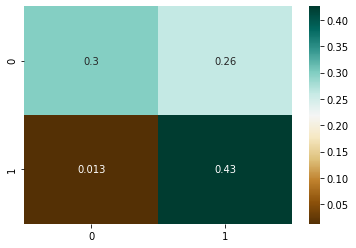

In [10]:
pred = lsvc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

In [11]:
sgdc = SGDClassifier(loss='log', penalty='l1')
sgdc.fit(X_car_c_train, y_car_c_train)
score = sgdc.score(X_car_c_test, y_car_c_test)
print('SGDClassifier Score on car accidents is: {}'.format(score))

SGDClassifier Score on car accidents is: 0.5621261860862526


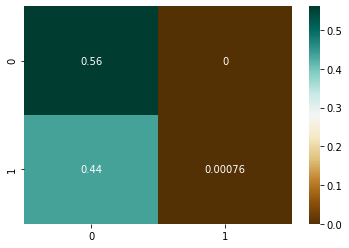

In [12]:
pred = sgdc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

It looks like the SVC classifier is the best of these. Let's see how it performs on the bike accident data. 

In [13]:
svc.fit(X_bike_c_train, y_bike_c_train)
score = svc.score(X_bike_c_test, y_bike_c_test)
print('SVC Score on bike accidents is: {}'.format(score))

SVC Score on bike accidents is: 0.7882358231775869


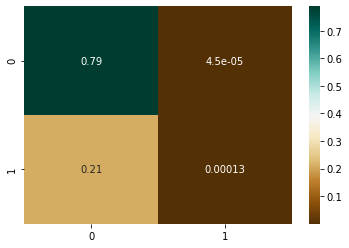

In [14]:
pred = svc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

That's pretty unbalanced for bike accidents. Lots of true negatives but no true positives. I'll try the other classifiers on bike accidents.

In [15]:
lsvc.fit(X_bike_c_train, y_bike_c_train)
score = lsvc.score(X_bike_c_test, y_bike_c_test)
print('Linear SVC Score on car accidents is: {}'.format(score))

Linear SVC Score on car accidents is: 0.6727526195080271


C:\Users\linne\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


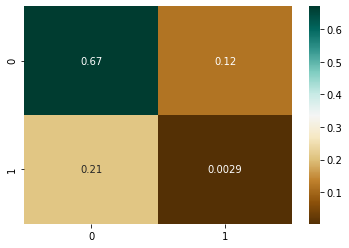

In [16]:
pred = lsvc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

In [17]:
sgdc.fit(X_bike_c_train, y_bike_c_train)
score = sgdc.score(X_bike_c_test, y_bike_c_test)
print('SGDClassifier Score on car accidents is: {}'.format(score))

SGDClassifier Score on car accidents is: 0.3651122003867428


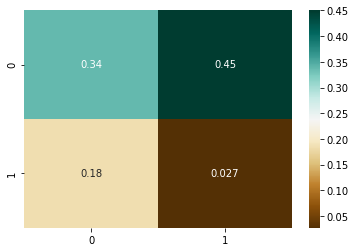

In [18]:
pred = sgdc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

Looks like it's going to be harder to  find a classifier for bike accidents than car accidents.

On to Tree Regressors [Go>>](Testing%20Models%20-%20Tree%20and%20Ensemble%20Regressors.ipynb)